# Review text analysis

In [1]:
# import the required libraries here
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews_filtered.csv')

Let's remind ourselves what our review DataFrame looked like, and check we're reading it in as expected.

In [3]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,q0n4I-zqiI47xispOqc1lA,0,2016-09-19,0,M9gD64U797dfIpLA9OHYVA,5,"Delicious, friendly staff, cool atmosphere, al...",0,eG6HneK9zLcuZpVuKcsCGQ
2,f-v1fvtnbdw_QQRsCnwH-g,0,2017-11-18,0,alI_kRKyEHfdHibYGgtJbw,1,I have to write a review on the Fractured Prun...,0,Fc_nb6N6Sdurqb-rwsY1Bw
3,RyTEGJz5tG7zC73BdXt-cQ,0,2016-11-18,0,6lRnO0n3QdkSGlJLUQb15w,5,Best veal sandwich ever ( i like rapini/ garli...,0,zx_Op2OAOM_fRic9tU-jqA
4,OX0T9dWI8b7meu-ljTo22A,0,2016-05-01,0,oz66Z8p9Etq0WbcZVCmm7w,5,"Friendliest staff, no matter how swamped they ...",0,0pf5VuzE4_1pwj5NJHG5TQ


We see the first review wasn't great, at two stars, but the second got five stars. Let's have a quick look at the full text for each.

## A two star review

In [4]:
reviews.loc[0, 'text']

"The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

This review does appear somewhat lukewarm, at best. On another note, we can see it talks about pizza and italian, which is some reassurance we made a good decision to combine the pizza and italian categories.

## A five star review

In [5]:
reviews.loc[1, 'text']

'Delicious, friendly staff, cool atmosphere, all around great experience! They have a pretty great selection of crepes and omelettes, among other things. I enjoyed the Cherry Omelette (cherry tomatoes, swiss cheese, potato slices, and bacon) which was pretty big and cooked perfectly! Nice side salad and bread as well. Coffee was great and our server was warm and polite. Would recommend!'

This certainly seems to be a good review. We'd be happy to see our restaurant associated with "cool atmosphere", "all around great experience" etc.

## Good and bad reviews
We don't want to have to read all the reviews in our dataset in order to find good and bad ones. Clearly 5 is best and 1 is worst, but how do we group them? Do we set a threshold in the middle, or just take the top and bottom ratings? Let's first see what the distribution of ratings looks like.

In [6]:
reviews['stars'].describe()

count    506291.000000
mean          3.721573
std           1.394583
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [7]:
star_counts = reviews['stars'].value_counts()

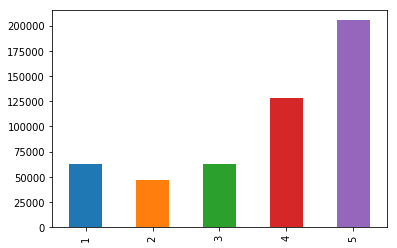

In [8]:
star_counts.sort_index().plot(kind='bar')

This is useful. It seems reviews with three stars or fewer are in the bottom quartile and reviews with five stars are in the top quartile. We could take five stars as being a single, best category, and three stars and fewer as being 'not good'.

## Visualizing reviews
From our analysis of the distribution of review star ratings, our first approach to delivering an answer to the marketing team will be to look at the most popular words in the best reviews and compare them with those in the worst reviews.

First, let's extract the good and bad reviews separately.

In [101]:
# task, filter the 'text' column using the 'stars' column to create Series of good and bad review text
# call the results good_review_text and bad_review_text, respectively
# two lines of code here:
good_review_text = reviews.loc[reviews['stars'] == 5, 'text']
bad_review_text = reviews.loc[reviews['stars'] < 4, 'text']

We can now double check how many rows we have, and that they seem to agree with the numbers of reviews we'd expect from the distribution of stars ratings above.

In [102]:
good_review_text.shape

(205164,)

In [103]:
bad_review_text.shape

(172890,)

Now that's actually quite a lot of reviews. For our purposes here, we'll start by just selecting the first 1000 reviews from each group on the assumption that they're randomly ordered. We'll also add a slight tidying step of converting the characters to lower case so we don't count 'Bad' and 'bad', for example, separately.

In [104]:
# task: select the first 1000 items in each of the good and bad review text Series and chain the
# str.lower() method to convert characters to lower case. Save the results back in place.
# two lines of code here:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [105]:
# Check first few good reviews
good_review_text.head()

1    delicious, friendly staff, cool atmosphere, al...
3    best veal sandwich ever ( i like rapini/ garli...
4    friendliest staff, no matter how swamped they ...
8    had the ruby salad, carpaccio, salmon, and rav...
9    5 doors north is my neighbourhood spot. i have...
Name: text, dtype: object

In [106]:
# check first few bad reviews
bad_review_text.head()

0     the pizza was okay. not the best i've had. i p...
2     i have to write a review on the fractured prun...
5     happy to be seated promptly on a friday evenin...
7     place is always packed for weekend dinners, ha...
10    one of the worst bar experiences i've ever had...
Name: text, dtype: object

So far, we've partitioned our reviews into groups we think of as 'great' and 'bad'. Our problem now is how to make sense of this. How do we interpret, or visualise, the information? A great way to get a visual look at how frequently certain words occur is by a wordcloud. A nice introduction to creating wordclouds is [here](https://www.datacamp.com/community/tutorials/wordcloud-python) in a DataCamp community article. You'll likely want to pay attention to the step for installing the relevant library in order to get the next import statement to work.

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

We first need to gather the reviews into a single corpus, for each of good and bad reviews, for wordcloud.

In [107]:
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

### Good wordcloud

Now, at last, we can create a wordcloud! Let's look at the top 50 words from the best reviews.

In [110]:
good_wordcloud = WordCloud(max_words=50).generate(good_text)

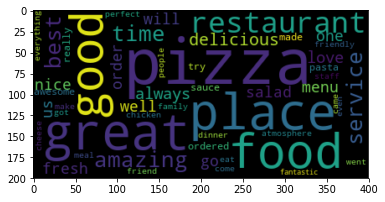

In [111]:
plt.imshow(good_wordcloud, interpolation='bilinear')

This is great! It looks sensible. In fact, someone from marketing just walked past your screen and already is interested in taking this image as it is and using it! They're so excited they would like a copy of that image to test in laying out their new marketing designs.

In [119]:
# task: use the to_file method for wordcloud to save the above image to send to marketing
# one line of code here
good_wordcloud.to_file('./top_review_words.png')

### Bad wordcloud

Can we learn anything extra from looking at the top words in bad reviews?

In [112]:
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

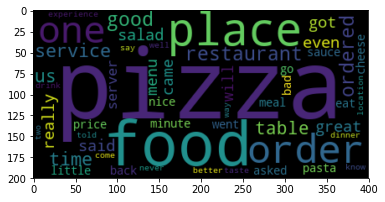

In [113]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

We notice some things here. Firstly, 'pizza' is a very prominent word, but it was in the top reviews as well. It's very obviously a relevant word for our target category, but is it useful in separating good and bad reviews? Probably not. We can also start to make some interesting observations that there seem to be more "dull" words here, such as "told", "said", "came", and "went". There is clearly a different tone between our two wordclouds. We've definitely achieved something useful here.

# Summary
Congratulations! You've achieved a lot since starting this project. You've related a business problem to a dataset and identified which data you needed. You've drilled into that data to answer an initial question of which food category the business should target. Then you've used knowledge gained from that to extract just the related reviews from a large file that, otherwise, would be too large to handle. You've further teased apart the best and the worst reviews to look at them separately and clearly seen there is a difference.

You already have a useful output, but you know that there's more that can be done. The rest of the notebook is entirely optional and gives some ideas for how you might refine what you've already done.

# Towards a better wordcloud

Having seen that some words that occur prominently in bad reviews were also in our good reviews, we can exclude these from our wordcloud by specifying them as stopwords. In fact, we may as well use a list of common stopwords readily available (STOPWORDS).

In [114]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [115]:
# task: create a set of stopwords and add the "bad" ones above to it
# two lines of code here:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

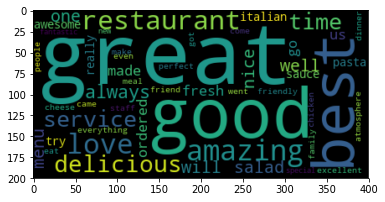

In [120]:
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')

Hopefully you can see we've now excluded some words. We'll leave it up to you and your marketing team whether you prefer the above version!

# Beyond words
The use of single words is a good start, but words occur in sequences and sequences can have much additional meaning. Consider a good review that said "Highly recommended" and a bad review that said "Not recommended". Analysing just single words, we would lose the "highly recommended" tag. What's more, with the approach of looking for words in good reviews that aren't in bad reviews, we would lose the word "recommended" entirely. Using sequences of two words, or bi-grams as they're known, would tackle this issue. Generally, in fact, we can consider n-grams.